<a href="https://colab.research.google.com/github/astrodatos/proyecto_iluminatiuwu/blob/master/Algoritmo_(beta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord

!pip install astroquery #esto para instalar astroquery
from astroquery.gaia import Gaia 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [41]:
"""
job = Gaia.launch_job_async("select top 1000000 \
solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val \
from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query

print(job) 
r = job.get_results()
print(r)
"""

'\njob = Gaia.launch_job_async("select top 1000000 solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query\n\nprint(job) \nr = job.get_results()\nprint(r)\n'

In [42]:
"""
jobpd=r.to_pandas() #convertimos el job a pandas
jobpd[:10] #vemos las primeras 10 filas para ver que todo está bien
"""

'\njobpd=r.to_pandas() #convertimos el job a pandas\njobpd[:10] #vemos las primeras 10 filas para ver que todo está bien\n'

In [26]:
"""
pd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val
datamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))

filtdata=jobpd.loc[datamask]

filtdata['class'] = 'A' #esto se arregla en la celda de abajo

filtdata
"""

"\npd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val\ndatamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))\n\nfiltdata=jobpd.loc[datamask]\n\nfiltdata['class'] = 'A' #esto se arregla en la celda de abajo\n\nfiltdata\n"

In [43]:
"""
maskO = (filtdata["teff_val"]>=33000)
filtdata.loc[maskO,'class'] = 'O'
maskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)
filtdata.loc[maskB,'class'] = 'B'
maskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)
filtdata.loc[maskA,'class'] = 'A'
maskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)
filtdata.loc[maskF,'class'] = 'F'
maskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)
filtdata.loc[maskG,'class'] = 'G'
maskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)
filtdata.loc[maskK,'class'] = 'K'
maskM = (filtdata["teff_val"]<3700)
filtdata.loc[maskM,'class'] = 'M'

filtdata
"""

'\nmaskO = (filtdata["teff_val"]>=33000)\nfiltdata.loc[maskO,\'class\'] = \'O\'\nmaskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)\nfiltdata.loc[maskB,\'class\'] = \'B\'\nmaskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)\nfiltdata.loc[maskA,\'class\'] = \'A\'\nmaskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)\nfiltdata.loc[maskF,\'class\'] = \'F\'\nmaskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)\nfiltdata.loc[maskG,\'class\'] = \'G\'\nmaskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)\nfiltdata.loc[maskK,\'class\'] = \'K\'\nmaskM = (filtdata["teff_val"]<3700)\nfiltdata.loc[maskM,\'class\'] = \'M\'\n\nfiltdata\n'

In [44]:
""""
jobpd.to_csv("tabla_1millon.csv")
"""

'"\njobpd.to_csv("tabla_1millon.csv")\n'

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


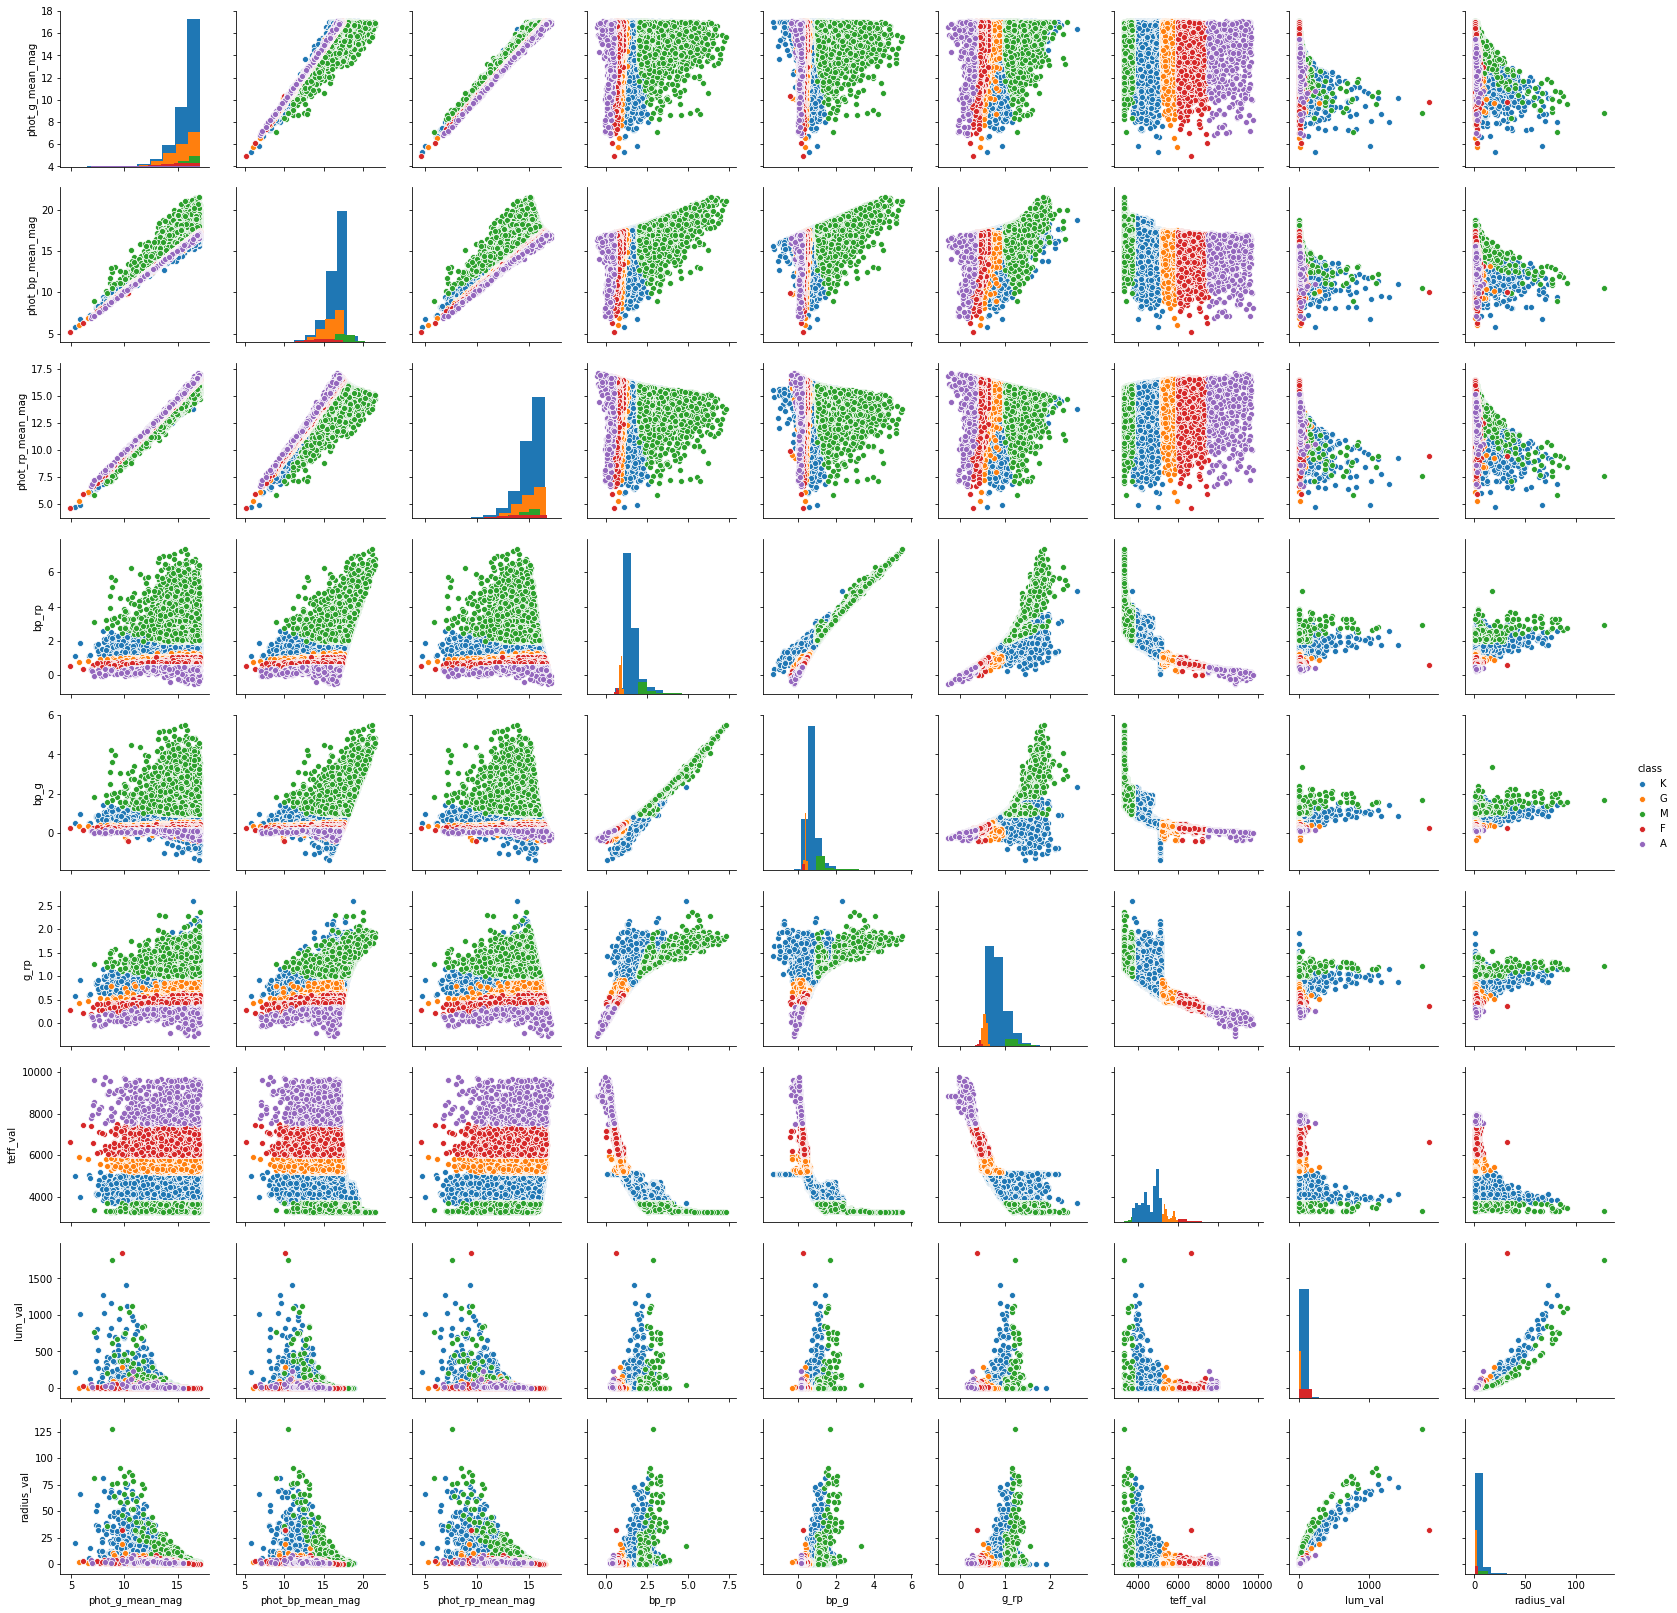

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets 
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  

data100=pd.read_csv("https://raw.githubusercontent.com/astrodatos/proyecto_iluminatiuwu/master/tabla_temperatura_y_tipo_espectral_(100mil).csv")

atributos=['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','teff_val','lum_val','radius_val']
sns.pairplot(data10, hue = 'class', vars=atributos, diag_kind = 'hist')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


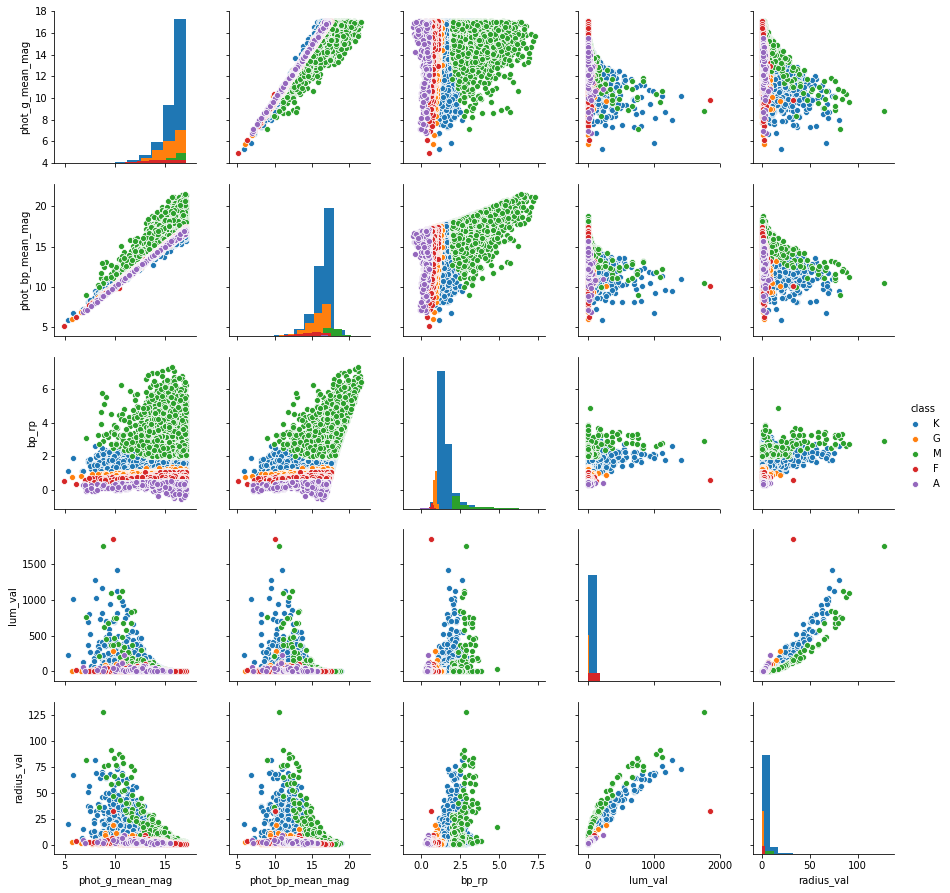

In [35]:
#Relaciones interesantes 
sns.pairplot(data100[['phot_g_mean_mag', 'phot_bp_mean_mag','bp_rp', 'lum_val','radius_val', 'class']], hue = 'class',diag_kind = 'hist')

In [50]:
#clases = data10['class'].unique() 
#mapa = {}
#for clase, i in enumerate(clases):
    #mapa[i] = clase
#clases
#mapa #No salen las clases O y B en clases ni en mapa por alguna 
#extraña razón, por lo que tendremos que hacerlo a mano


clases = np.array(['O','B','A','F','G','K','M'], dtype=object)
mapa={'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}

#data100
phot_g_mean_mag=data100.iloc[:,6]
phot_bp_mean_mag=data100.iloc[:,7]
phot_rp_mean_mag=data100.iloc[:,8]
bp_rp=data100.iloc[:,9]
bp_g=data100.iloc[:,10]
g_rp=data100.iloc[:,11]
teff_val=data100.iloc[:,12]
lum_val=data100.iloc[:,13]
radius_val=data100.iloc[:,14]

tabla = ('/content/gdrive/My Drive/Taller de proyecto/tabla_1millon.csv')
tabla1millon=pd.read_csv(tabla)
tabla1millon

,Unnamed: 0,solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val
0,0,1635721458409799680,0,4205572950572486656,284.997397,-7.213794,18.246520,18.827530,17.534872,1.292658,0.581011,0.711647,NaN,NaN,NaN
1,1,1635721458409799680,1,4205565597589384320,285.403309,-7.148584,17.277395,17.743320,16.645607,1.097714,0.465925,0.631788,NaN,NaN,NaN
2,2,1635721458409799680,2,4053206649305182080,275.626769,-25.133812,19.644129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1635721458409799680,3,4205568964799943680,285.346380,-7.110390,20.402403,20.705967,19.725151,0.980816,0.303564,0.677252,NaN,NaN,NaN
4,4,1635721458409799680,4,4049398731303340416,274.009409,-30.525125,19.241173,19.158228,18.095499,1.062729,-0.082945,1.145674,NaN,NaN,NaN
5,5,1635721458409799680,5,4053206924184153472,275.737952,-25.143911,19.238544,19.359943,17.496092,1.863851,0.121399,1.742453,NaN,NaN,NaN
6,6,1635721458409799680,6,2944217403015932032,96.875156,-15.996720,21.065298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1635721458409799680,7,4205572263340546688,284.957509,-7.214939,20.697376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1635721458409799680,8,5889059805439854848,234.271140,-52.218658,16.638042,17.331743,15.816595,1.515148,0.693701,0.821447,4368.4600,NaN,NaN
9,9,1635721458409799680,9,4049398765669294976,274.018619,-30.513203,19.936490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
from sklearn.model_selection import train_test_split

X = np.array(data100.iloc[:,:-1])
y = np.array(data100['class'].map(mapa))

rs = 1851

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = rs)

#Lo de abajo es solo para probar si funciona Kneighbors, ya que solo bastaba 
#copiar y pegar parte del código de la actividad 5

#Cabe destacar que no usaremos este algoritmo, solo 
#utilizaremos svm y random forest

from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_neighbors=25) #25 vecinos
# Entrenamos el clasificador utilizando los atributos y clases (respectivamente)
#esperadas de acuerdo al conjunto de entrenamiento
knn_clf.fit(train_X, train_y) 



#La linea superior tira error debido a los NaN de lum_val. Si es que
#este error se repite al hacer svm y random forest en el futuro, hay que
#cambiar data10 eliminando esta columna o hacer que ignore los NaN.

ValueError: ignored